# Objective :  Predict Restaurant Ratings
# Regression

## Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.
- Preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

- Select a regression algorithm (e.g., linear regression, decision tree regression) and train it on the training data.

- Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.

- Interpret the model's results and analyze the most influential features affecting restaurant ratings.

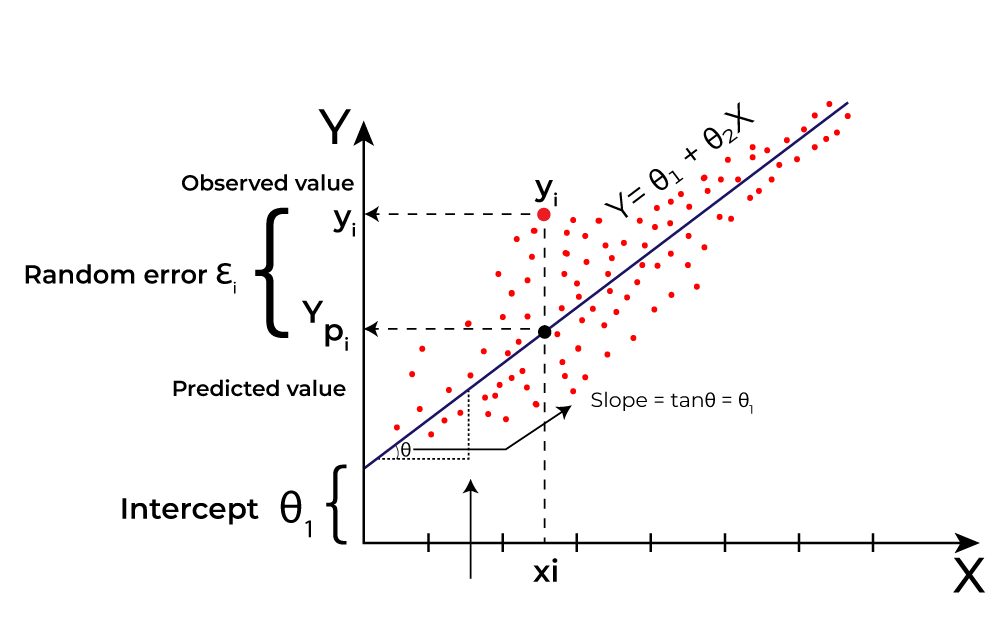

# 1. Load Python Modules

In [111]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error
from sklearn.metrics import r2_score

# 2. Read the Dataset from csv/excel file  - Using Pandas


In [112]:
file_path=r"Dataset .csv"
df=pd.read_csv(file_path)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### 2.1 Non-Significant columns - we need to drop here.
 - we can not find any insights from them

In [113]:
#drop - sensitive - non imp columns
print(df["Restaurant ID"].nunique())
df.drop("Restaurant ID",axis=1,inplace=True)

9551


# 3. Basic Inspection on given dataset
- Head , tail , sample
- Shape , len , size
- dtypes , columns , info
- isnull().sum() , isna().sum()

In [114]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(df)

top 5 rows - using head
          Restaurant Name  Country Code              City  \
0        Le Petit Souffle           162       Makati City   
1        Izakaya Kikufuji           162       Makati City   
2  Heat - Edsa Shangri-La           162  Mandaluyong City   
3                    Ooma           162  Mandaluyong City   
4             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas

$Observations$
1. Aggregate rating - is target columns - with min 0 and max 5. It is Regression
2. Price range, Votes, Average Cost for two - I consider imp features in Numberical columns
3. Rating text , Rating color are the same - Representing the same  - one in text and another in categorical
3. Has Table booking, Has Online delivery,Rating color -  I consider imp features in categorical columns

# 4. Handling Missing Values - Cat - Variables
 - Replace with Mode - One of the Method

In [115]:
# No Missing Values - I am skipping this section
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [116]:
df.select_dtypes(include='object').columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

# 5. Categorical- UniVariable - Analysis -Using Pipeline
   - Frequency Table 
   - Bar Graph
   - Pie Graph

In [117]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()         
        

Has Table booking frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   8393    |
| 1 |  Yes  |   1158    |
+---+-------+-----------+
Has Table booking Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   8393    |        87.88         |
| 1 |  Yes  |   1158    |        12.12         |
+---+-------+-----------+----------------------+


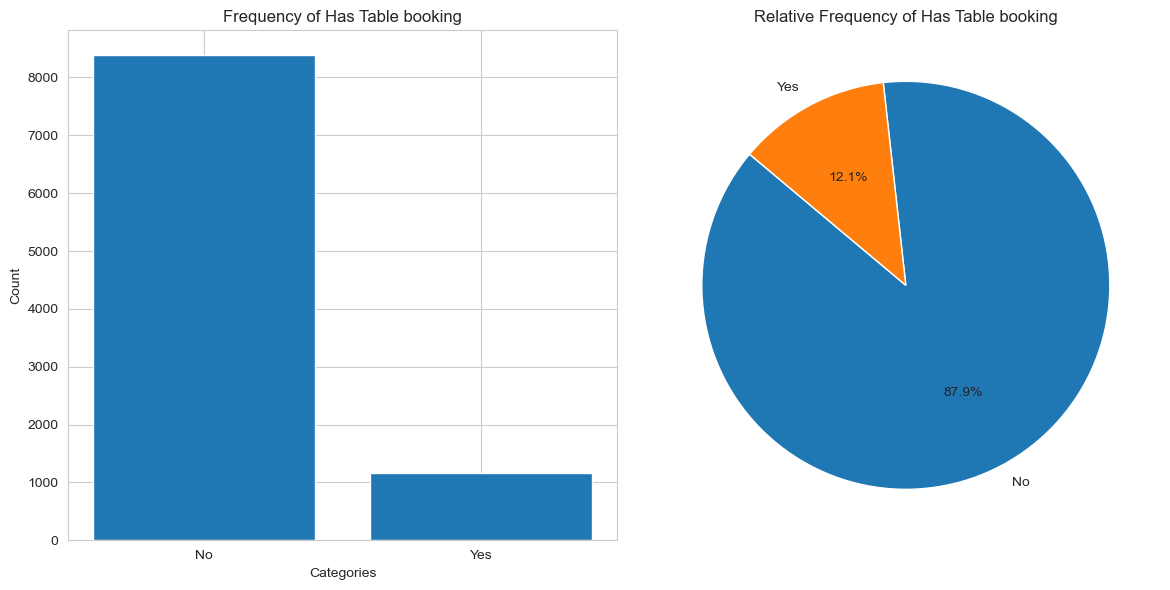

Has Online delivery frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   7100    |
| 1 |  Yes  |   2451    |
+---+-------+-----------+
Has Online delivery Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   7100    |        74.34         |
| 1 |  Yes  |   2451    |        25.66         |
+---+-------+-----------+----------------------+


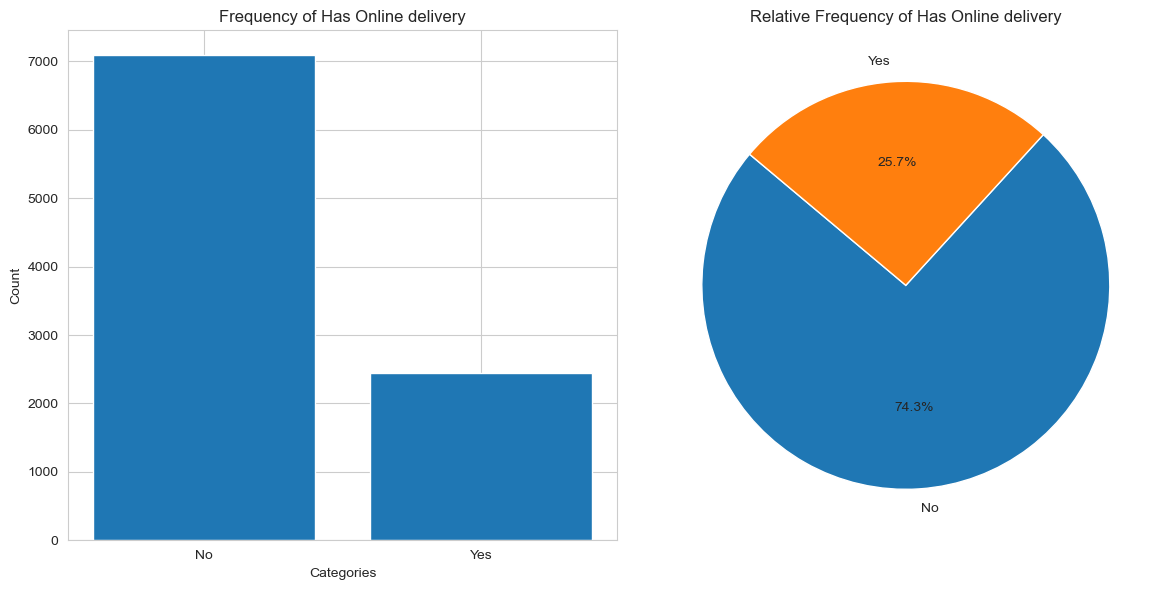

Rating color frequency table
+---+------------+-----------+
|   |   Class    | Frequency |
+---+------------+-----------+
| 0 |   Orange   |   3737    |
| 1 |   White    |   2148    |
| 2 |   Yellow   |   2100    |
| 3 |   Green    |   1079    |
| 4 | Dark Green |    301    |
| 5 |    Red     |    186    |
+---+------------+-----------+
Rating color Relative frequency table
+---+------------+-----------+----------------------+
|   |   Class    | Frequency | Relative Frequency % |
+---+------------+-----------+----------------------+
| 0 |   Orange   |   3737    |        39.13         |
| 1 |   White    |   2148    |        22.49         |
| 2 |   Yellow   |   2100    |        21.99         |
| 3 |   Green    |   1079    |         11.3         |
| 4 | Dark Green |    301    |         3.15         |
| 5 |    Red     |    186    |         1.95         |
+---+------------+-----------+----------------------+


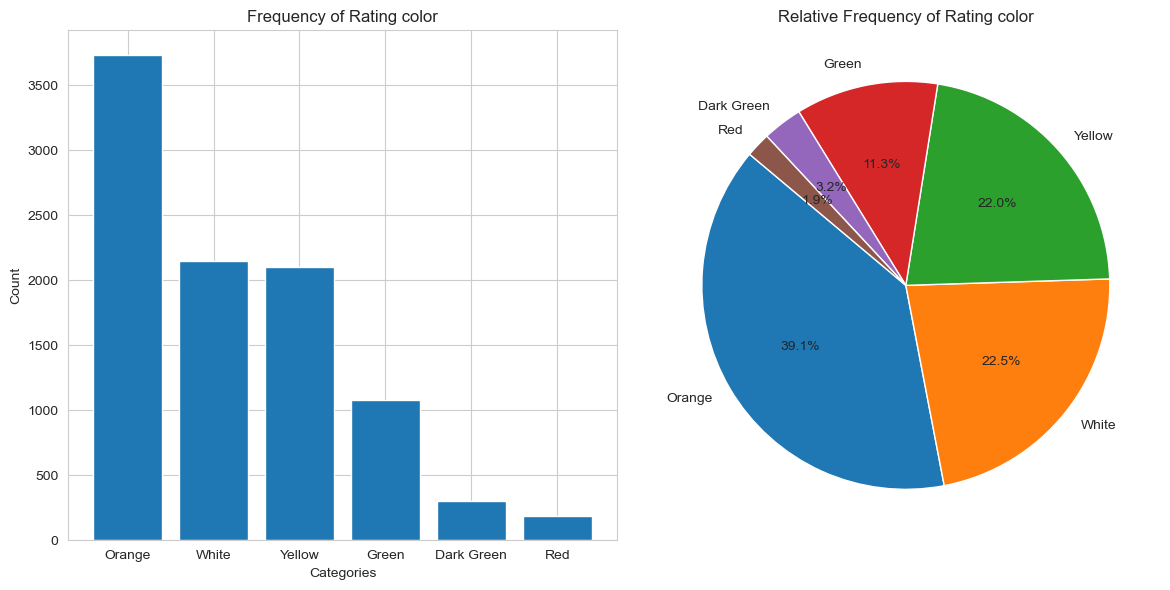

In [118]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

cat_df = df[[ 'Has Table booking', 'Has Online delivery', 'Rating color']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(cat_df)

# 6. Handling Missing Values in Numerical Columns
- Replace with Median - One of the Method

# 7. Numerical - UniVariable - Analysis - Using -Pipeline
- Frequency Interval - Data Distribution Table
- Histogram Graph
- Hist with KDE Graph
- Box Plots

In [119]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()


            
        
        

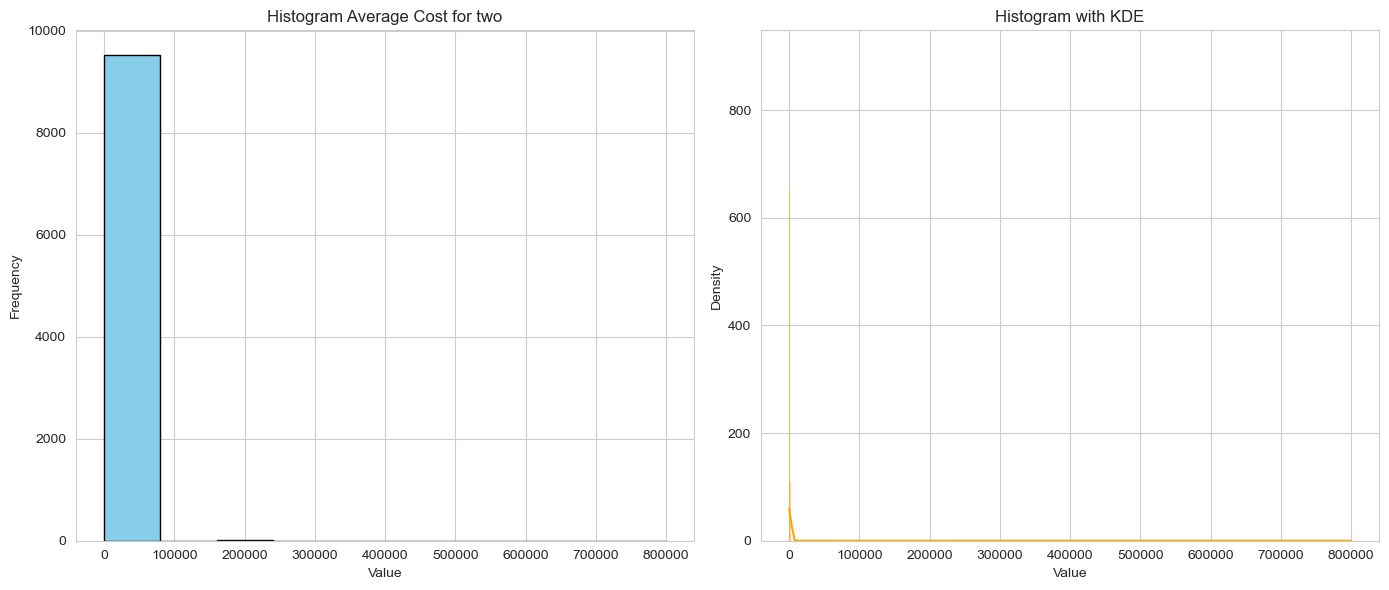

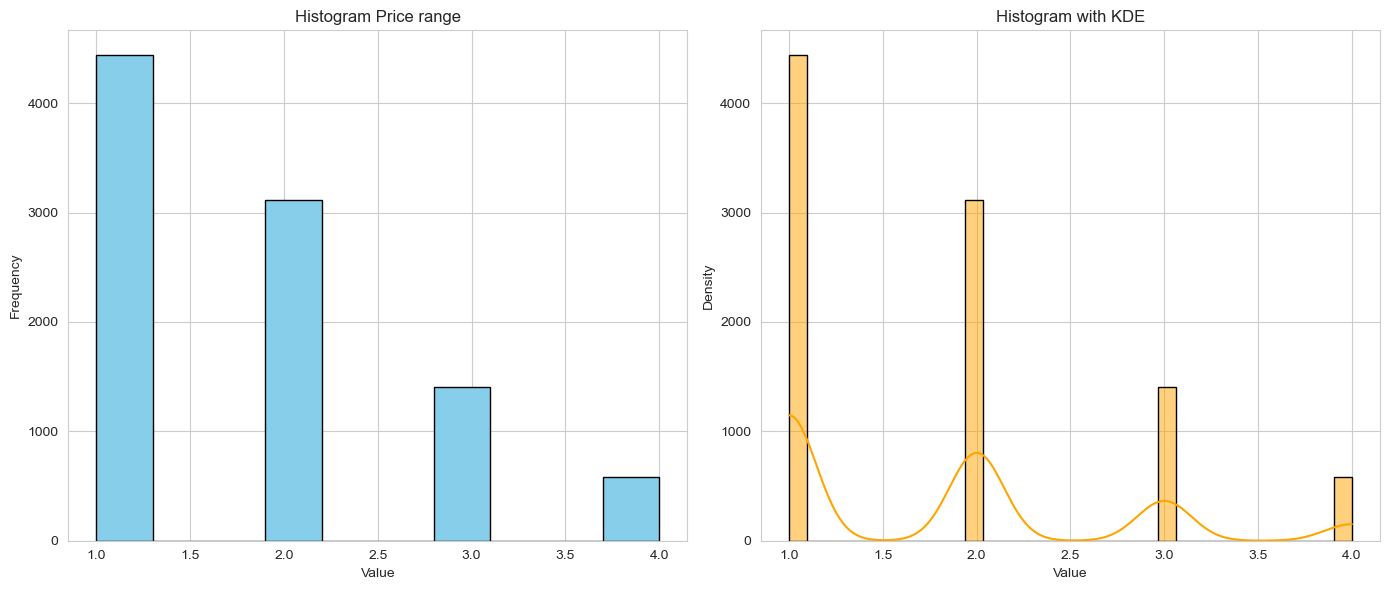

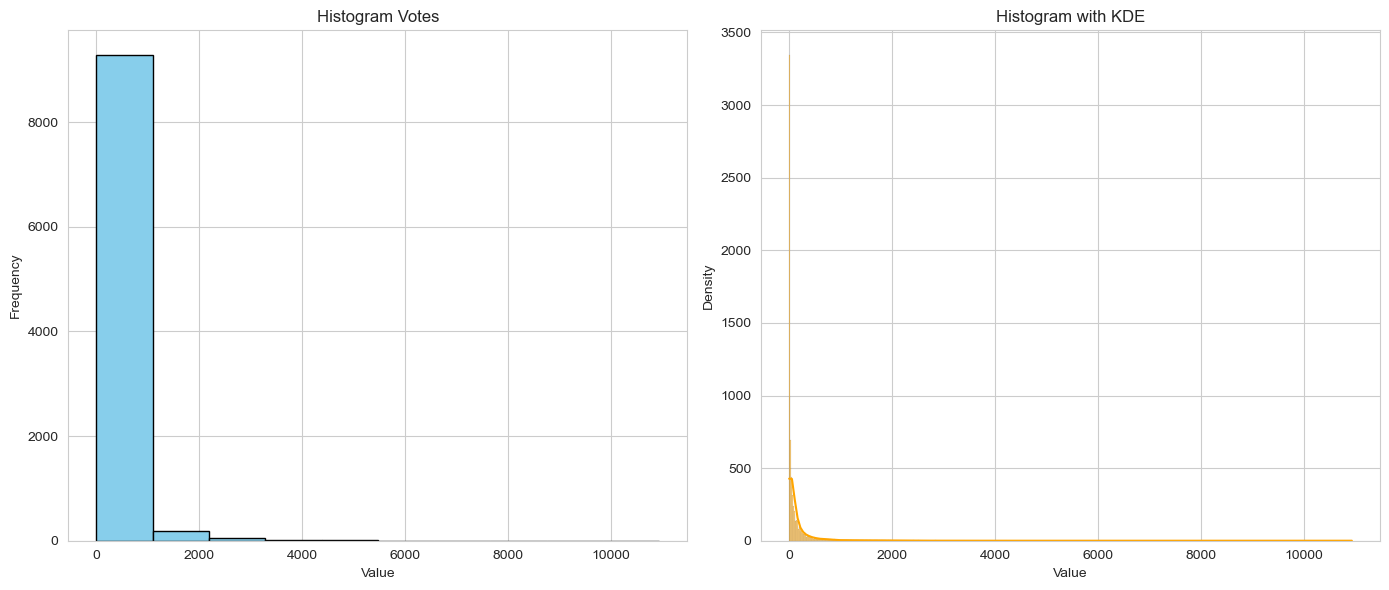

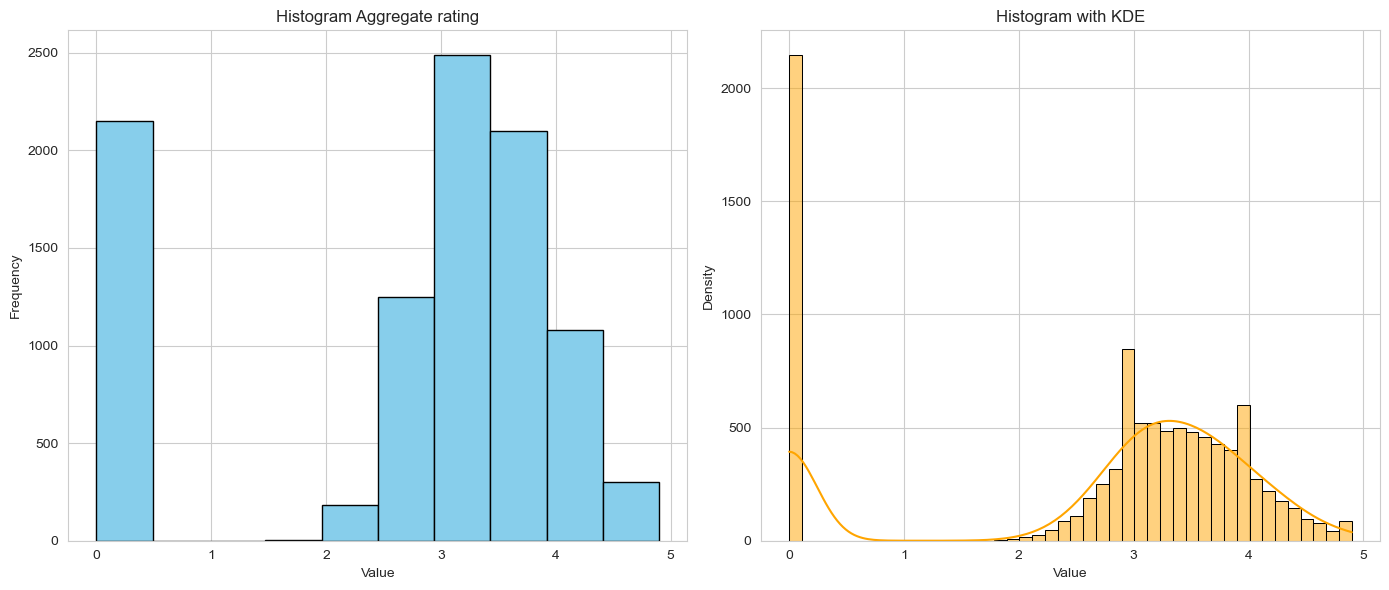

In [120]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

num_df = df[[ 'Average Cost for two', 'Price range', 'Votes', 'Aggregate rating']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(num_df)

In [121]:
df_selected = df[[ 'Has Table booking', 'Has Online delivery', 'Rating color', 'Average Cost for two','Price range', 'Votes','Aggregate rating']].copy()

# 8. Numerical - Variables -Outliers Analysis
- IQR Method 
- -3Sigma to +3 Sigma Method

# 9. Bi Variate Analysis

## Cat Vs Num


In [122]:
df_selected.select_dtypes(include='object').columns


Index(['Has Table booking', 'Has Online delivery', 'Rating color'], dtype='object')

In [123]:
df_selected.select_dtypes(exclude='object').columns

Index(['Average Cost for two', 'Price range', 'Votes', 'Aggregate rating'], dtype='object')

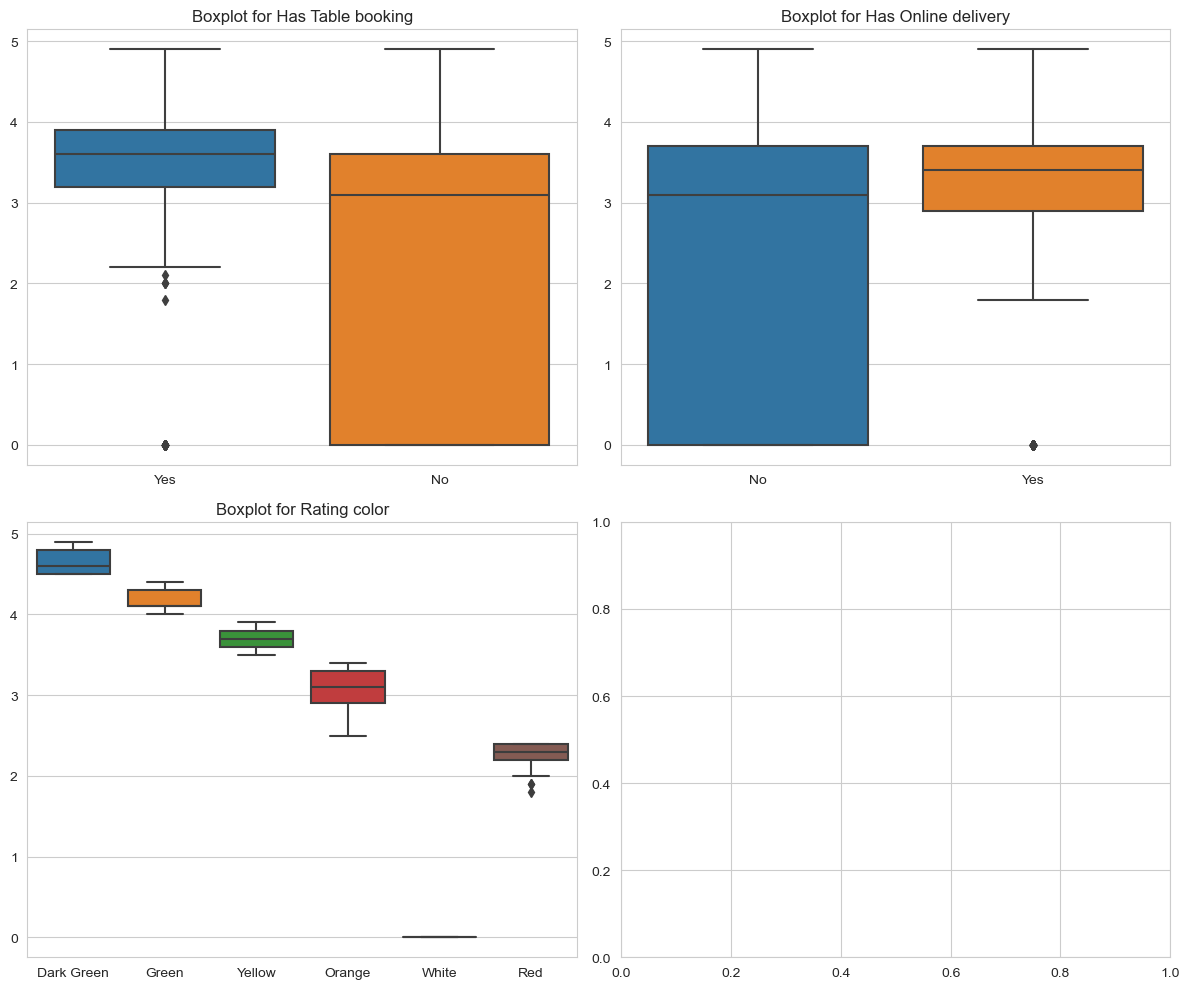

In [124]:
target='Aggregate rating'
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot boxplots
for i, ax in zip(['Has Table booking', 'Has Online delivery', 'Rating color'], axes):
    sns.boxplot(x=i, y=target, data=df_selected, ax=ax)
    ax.set_title(f'Boxplot for {i}')
    ax.set_xlabel('')
    ax.set_ylabel('')  # Assuming target variable name is provided elsewhere
    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

## Num Vs Num
- Scatter Plot with Hue
- co-relation(co-varaince ,co-relation coffiencnt)
- heatmap

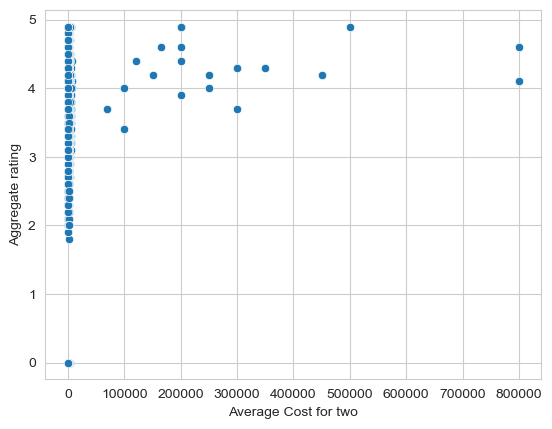

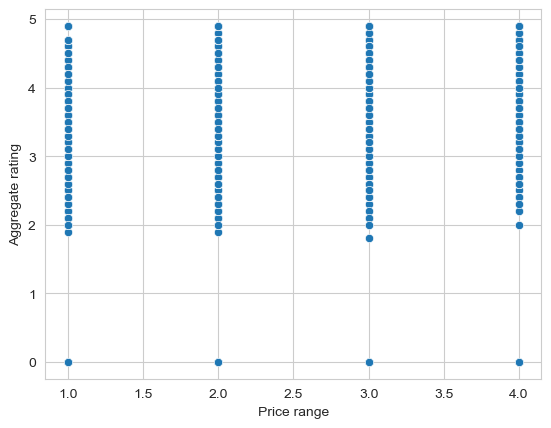

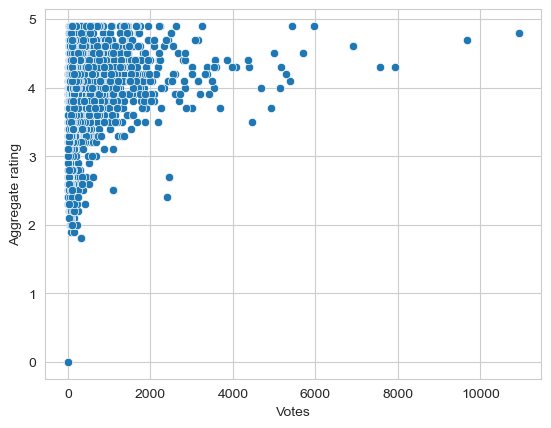

In [125]:
#print(cars_price_df.columns)
for num_var in ['Average Cost for two', 'Price range', 'Votes']:
    sns.scatterplot(data=df_selected,y=target,x=num_var)
    plt.show()

In [126]:
 df_selected[['Average Cost for two', 'Price range', 'Votes','Aggregate rating']].corr()

,Average Cost for two,Price range,Votes,Aggregate rating
Average Cost for two,1.000000,0.075083,0.067783,0.051792
Price range,0.075083,1.000000,0.309444,0.437944
Votes,0.067783,0.309444,1.000000,0.313691
Aggregate rating,0.051792,0.437944,0.313691,1.000000


# 10. Data Transformation

### 10.1 left - skewed  to Normal

### 10.2 Right - Skewed  to Normal 

### 10.3 Different distributions to normal distribution

# 11. Standization - Normalization
- Min Max Scaler
- Standard Scaler

# 12. Convert Cat - to - Numerical Columns
- One-Hot-Enconding
- Label Encoding

In [127]:
from sklearn.preprocessing import LabelEncoder
df_selected['Has Table booking_label_en'] = label_encoder.fit_transform(df_selected['Has Table booking'])
df_selected['Has Online delivery_label_en'] = label_encoder.fit_transform(df_selected['Has Online delivery'])
df_selected['Rating color_label_en'] = label_encoder.fit_transform(df_selected['Rating color'])

In [128]:
cat_onehot_df = pd.get_dummies(df_selected[['Has Table booking','Has Online delivery','Rating color']],  drop_first=False)

# Concatenate the dummy variables with the original DataFrame
df_final = pd.concat([df_selected, cat_onehot_df], axis=1)
df_final

,Has Table booking,Has Online delivery,Rating color,Average Cost for two,Price range,Votes,Aggregate rating,Has Table booking_label_en,Has Online delivery_label_en,Rating color_label_en,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow
0,Yes,No,Dark Green,1100,3,314,4.8,1,0,0,False,True,True,False,True,False,False,False,False,False
1,Yes,No,Dark Green,1200,3,591,4.5,1,0,0,False,True,True,False,True,False,False,False,False,False
2,Yes,No,Green,4000,4,270,4.4,1,0,1,False,True,True,False,False,True,False,False,False,False
3,No,No,Dark Green,1500,4,365,4.9,0,0,0,True,False,True,False,True,False,False,False,False,False
4,Yes,No,Dark Green,1500,4,229,4.8,1,0,0,False,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,No,No,Green,80,3,788,4.1,0,0,1,True,False,True,False,False,True,False,False,False,False
9547,No,No,Green,105,3,1034,4.2,0,0,1,True,False,True,False,False,True,False,False,False,False
9548,No,No,Yellow,170,4,661,3.7,0,0,5,True,False,True,False,False,False,False,False,False,True
9549,No,No,Green,120,4,901,4.0,0,0,1,True,False,True,False,False,True,False,False,False,False


# 13. Reduce the Number of Columns
- PCA
- tsne

# 14. Inferential statistics test
- chi-square test
- ANOVA Test
- t-test(one and two tail test)
- biserial correlation coefficient

## VIF

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
# the independent variables set 
X = df_final[['Average Cost for two', 'Price range', 'Votes']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                feature       VIF
0  Average Cost for two  1.012673
1           Price range  1.241370
2                 Votes  1.238781


### Label Encoding

In [130]:
for i in ['Has Table booking_label_en','Has Online delivery_label_en','Rating color_label_en']:
    df_final[i] = df_final[i].astype(int)

In [131]:
import statsmodels.api as sm
X = sm.add_constant(df_final[['Has Table booking_label_en','Has Online delivery_label_en','Rating color_label_en','Average Cost for two', 'Price range', 'Votes']])

# Fit a linear regression model
model = sm.OLS(df_final['Aggregate rating'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")

                            OLS Regression Results                            
Dep. Variable:       Aggregate rating   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     843.5
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:16:28   Log-Likelihood:                -15496.
No. Observations:                9551   AIC:                         3.101e+04
Df Residuals:                    9544   BIC:                         3.106e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [132]:
import statsmodels.api as sm
X = sm.add_constant(df_final[['Has Table booking_label_en','Has Online delivery_label_en','Rating color_label_en', 'Price range', 'Votes']])

# Fit a linear regression model
model = sm.OLS(df_final['Aggregate rating'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")

                            OLS Regression Results                            
Dep. Variable:       Aggregate rating   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1012.
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:16:28   Log-Likelihood:                -15497.
No. Observations:                9551   AIC:                         3.101e+04
Df Residuals:                    9545   BIC:                         3.105e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### One-hot-enconding

In [133]:
for i in ['Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes',
       'Rating color_Dark Green', 'Rating color_Green', 'Rating color_Orange',
       'Rating color_Red', 'Rating color_White', 'Rating color_Yellow']:
    df_final[i] = df_final[i].astype(int)

In [134]:
import statsmodels.api as sm
X = sm.add_constant(df_final[['Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes',
       'Rating color_Dark Green', 'Rating color_Green', 'Rating color_Orange',
       'Rating color_Red', 'Rating color_White', 'Rating color_Yellow', 'Price range', 'Votes']])

# Fit a linear regression model
model = sm.OLS(df_final['Aggregate rating'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")

                            OLS Regression Results                            
Dep. Variable:       Aggregate rating   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 7.605e+04
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:16:28   Log-Likelihood:                 2943.6
No. Observations:                9551   AIC:                            -5867.
Df Residuals:                    9541   BIC:                            -5796.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

$Observations$
- Durbin-Watson (1.876) - Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

# 15. ML - Linear Regression Model

In [135]:

X=df_final[['Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes',
       'Rating color_Dark Green', 'Rating color_Green', 'Rating color_Orange',
       'Rating color_Red', 'Rating color_White', 'Rating color_Yellow', 'Price range', 'Votes']].copy()
Y=df_final['Aggregate rating']

In [136]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))
X.columns

train data length: 6685
test data length: 2866


Index(['Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes',
       'Rating color_Dark Green', 'Rating color_Green', 'Rating color_Orange',
       'Rating color_Red', 'Rating color_White', 'Rating color_Yellow',
       'Price range', 'Votes'],
      dtype='object')

In [137]:
def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared score.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_samples: int, number of samples (observations)
    - n_features: int, number of features (predictors)

    Returns:
    - adjusted R-squared score
    """
    from sklearn.metrics import r2_score

    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    
    return adjusted_r_squared


In [138]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
print("Model - Linear Regression")
Y_pred = lr.predict(X_test)
print("columns:",X_train.columns)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)

# Evaluate the model's performance
print("train R squared Score:",lr.score(X_train,Y_train))
print("Test R squared Score:",lr.score(X_test,Y_test))
print("Test R squaredscore:",r2_score(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",root_mean_squared_error(Y_test,Y_pred))
print("Adj-R squared Score",adjusted_r_squared(Y_test,Y_pred,len(Y_test),10))

Model - Linear Regression
columns: Index(['Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes',
       'Rating color_Dark Green', 'Rating color_Green', 'Rating color_Orange',
       'Rating color_Red', 'Rating color_White', 'Rating color_Yellow',
       'Price range', 'Votes'],
      dtype='object')
Coefficients:  [ 6.12135676e-03 -6.12135676e-03  7.49911188e-03 -7.49911188e-03
  1.64676499e+00  1.16866302e+00  9.47611138e-02 -6.66936972e-01
 -2.95390429e+00  7.10652135e-01  2.32439370e-02  3.58460291e-05]
Intercept: 2.9123790084107894
train R2 Score: 0.986486007647354
Test R2 Score: 0.985683008451928
Test R2 score: 0.985683008451928
MSE: 0.032855957328488054
RMSE: 0.18126212325935073
Adj-R Score 0.9856328613711992


$Observations$
1. 'Rating color' feature  is  influential features affecting restaurant ratings.


# 15. Erros - Normaly distributed

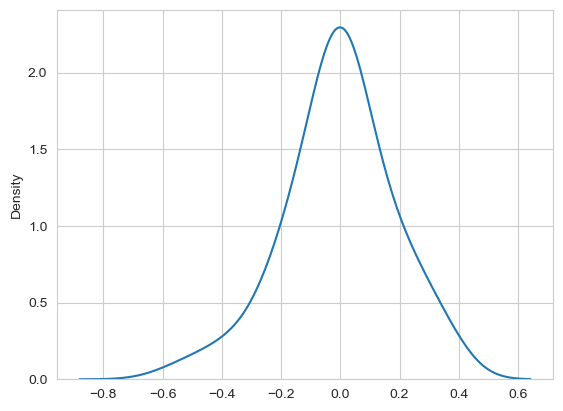

In [139]:
delta_y = Y_test - Y_pred;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw_method=0.5)
plt.show()

## Decision Tree Regression

In [141]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the model
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
print("Model - Decision Tree Regression")

# Predict on training set
#Evaluate the model's performance
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(Y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("train - MSE",train_mse)
print("train - RMSE",train_rmse)
# R2 score
r2 = r2_score(Y_train, y_train_pred)
print("train-R squared Score",r2)

# Predict on test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(Y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test - MSE",test_mse)
print("test - RMSE",test_rmse)
# R2 score
r2 = r2_score(Y_test, y_test_pred)
print("test-R squared Score",r2)
print("Adj-R squared Score",adjusted_r_squared(Y_test,Y_pred,len(Y_test),10))

Model - Decision Tree Regression
train - MSE 0.014581134503286854
train - RMSE 0.12075236852040151
train-R 2 Score 0.9936625933331446
test - MSE 0.04523703206031132
test - RMSE 0.2126899905033411
test-R 2 Score 0.980287952069326
Adj-R Score 0.9856328613711992


$Observations$
1. 'Rating color' feature  is  influential features affecting restaurant ratings.
